<a href="https://colab.research.google.com/github/SrijaniDas-GitHub/Classification_problems/blob/master/Fish_Species_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source of this dataset

https://www.kaggle.com/aungpyaeap/fish-market

# About the data

Fish Market Dataset contains information about common fish species in market sales. The dataset includes the fish species, weight, length, height, and width. 

# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the data

In [2]:
fish_data = pd.read_csv("/content/Fish data.csv")

In [3]:
fish_data.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [4]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
fish_data.groupby('Species').mean()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


# Visualizing Data

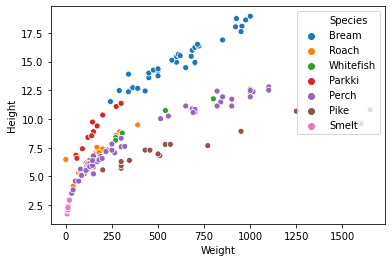

In [6]:
sns.scatterplot(fish_data['Weight'], fish_data['Height'], hue=fish_data['Species'])

# Splitting the data for training and testing

In [7]:
X = fish_data.drop('Species', axis=1)
y = fish_data['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# Model Evaluating

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
def evaluate_model_performance(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

# Decision Tree Classification

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.78125
[[9 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 5 0 4 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 2 0 1]]
              precision    recall  f1-score   support

       Bream       1.00      0.90      0.95        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.83      0.56      0.67         9
        Pike       1.00      1.00      1.00         3
       Roach       0.14      1.00      0.25         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       1.00      0.33      0.50         3

    accuracy                           0.78        32
   macro avg       0.85      0.83      0.77        32
weighted avg       0.93      0.78      0.82        32



# Random Forest Classification

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_model_performance(y_test, y_pred)

0.78125
[[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  6  0  3  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  2  0  0]]
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.75      0.67      0.71         9
        Pike       1.00      1.00      1.00         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.78        32
   macro avg       0.68      0.67      0.67        32
weighted avg       0.80      0.78      0.79        32



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN Classifier

Text(0, 0.5, 'Error Rate')

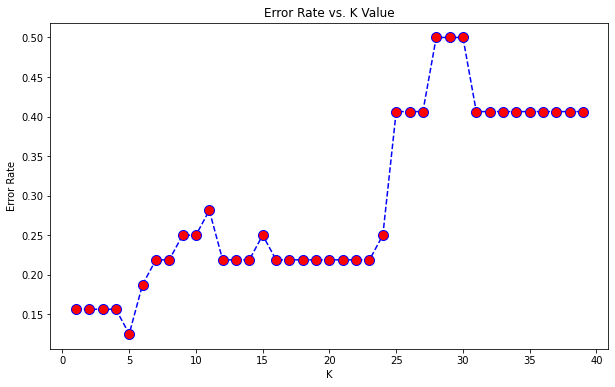

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Calculating the K value for the best performance
error_rate = []

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled,y_train)
    pred_i = model.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

evaluate_model_performance(y_test, y_pred)

0.875
[[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  8  0  1  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  3  0  0  0  0]]
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.73      0.89      0.80         9
        Pike       1.00      1.00      1.00         3
       Roach       0.50      1.00      0.67         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.88        32
   macro avg       0.75      0.84      0.78        32
weighted avg       0.81      0.88      0.84        32



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
comparing_result = pd.DataFrame(columns=['original species', 'predicted species'])
comparing_result['original species'] = y_test
comparing_result['predicted species'] = y_pred

for i in comparing_result.index:
    if comparing_result['original species'][i] != comparing_result['predicted species'][i]:
        print(comparing_result.loc[i])

original species     Whitefish
predicted species        Perch
Name: 55, dtype: object
original species     Whitefish
predicted species        Perch
Name: 60, dtype: object
original species     Perch
predicted species    Roach
Name: 96, dtype: object
original species     Whitefish
predicted species        Perch
Name: 56, dtype: object


# Conclusion

We will use KNN Classifier for this data, here we have got highest accuracy of 87%